# Importación de librerías

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from src.preparation.data_access.obtained_text_da import ObtainedTextDA

%matplotlib inline

/home/hans/Documentos/Tesis_Chatbot/env/lib/python3.8/site-packages/sqlalchemy/orm/util.py:104: SAWarning: The 'delete-orphan' cascade option requires 'delete'.
  util.warn(


# Obteniendo los datos

In [5]:
texts = ObtainedTextDA().select_all_as_dataframe().drop(columns=['cluster_grade'])
texts

,CNCADC,CNCAdd,CNCAll,CNCCaus,CNCLogic,CNCTemp,CRFANP1,CRFANPa,CRFAO1,CRFAOa,...,WRDPRP1s,WRDPRP2p,WRDPRP2s,WRDPRP3p,WRDPRP3s,WRDVERB,category,filename,grade,id
0,5.595524,0.532907,56.754596,17.319478,30.109246,3.197442,0.099526,0.079630,0.236967,0.148887,...,0.000000,0.000000,0.000000,2.398082,10.125233,110.578204,"Historia, Geografía y Economía",atahualpa.txt,1.0,1.0
1,4.526167,0.848656,56.294201,13.861386,33.663366,3.394625,0.159722,0.119540,0.291667,0.197797,...,0.565771,0.000000,0.848656,2.545969,8.769448,94.766620,"Historia, Geografía y Economía",avelino_caceres.txt,1.0,2.0
2,1.737619,0.000000,59.079062,11.294526,40.834057,5.212858,0.026316,0.019822,0.197368,0.150034,...,0.000000,0.000000,5.212858,1.737619,9.556907,149.435274,"Historia, Geografía y Economía",cartilla_fenomeno_nino.txt,1.0,3.0
3,1.765225,1.765225,64.430715,12.356575,44.130627,4.413063,0.035714,0.039216,0.166667,0.142577,...,0.000000,0.000000,9.708738,0.000000,9.708738,151.809356,"Historia, Geografía y Economía",cartilla_inundaciones.txt,1.0,4.0
4,5.965697,0.248571,52.945563,13.422819,30.325628,2.982849,0.151515,0.171011,0.430303,0.273384,...,0.000000,0.000000,0.000000,1.739995,10.688541,93.711161,"Historia, Geografía y Economía",enrique_meiggs.txt,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,10.168675,1.012048,60.096386,15.084337,24.626506,9.204819,0.153777,0.113482,0.229317,0.130330,...,12.144578,2.650602,15.180723,2.409639,20.192771,118.265060,Comunicación,seis_personajes_busca.txt,2.0,181.0
179,8.489796,0.593692,56.653061,15.762523,25.751391,6.055659,0.072211,0.051115,0.170490,0.105130,...,10.241187,0.044527,2.077922,1.128015,9.261596,108.897959,Comunicación,viaje_centro_tierra.txt,2.0,182.0
180,8.669041,0.941620,74.623352,19.456726,40.274707,5.281258,0.328918,0.254774,0.546726,0.382347,...,20.848686,0.194465,0.020470,3.531073,13.745599,114.120200,Comunicación,viajes_gulliver.txt,2.0,183.0
181,4.147928,0.218312,82.958564,22.355150,52.045584,4.191591,0.287313,0.192939,0.375622,0.225790,...,22.879099,0.480286,2.357770,2.969043,22.922761,102.606645,Comunicación,vida_lazarillo_tormes.txt,2.0,184.0


# EDA

## Visualizando la cantidad de documentos

### Total de documentos por categoria por grados

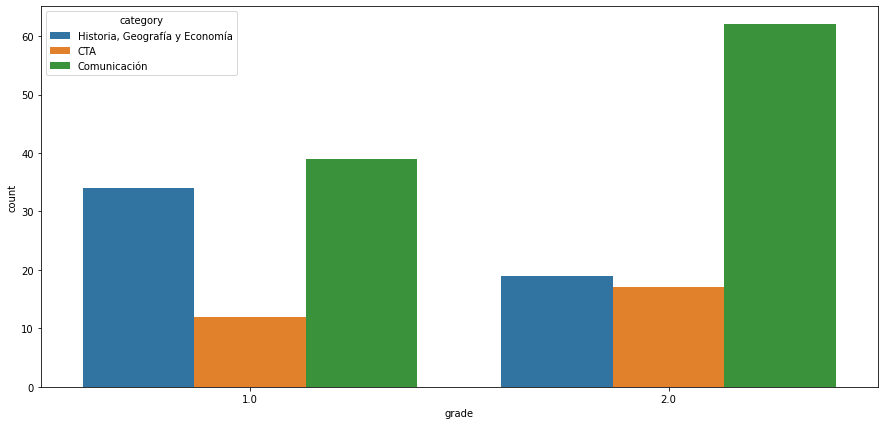

In [3]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.countplot(x="grade", hue='category', data=texts, ax=ax)

### Total por grados

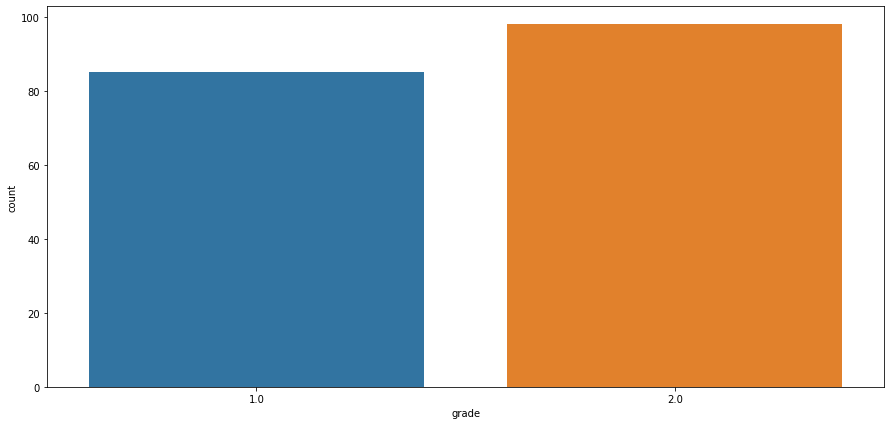

In [4]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.countplot(x="grade", data=texts, ax=ax)